<a href="https://colab.research.google.com/github/MarkusDarkus/Data_Analytics/blob/Test_tasks/Statistic_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STATISTIC_1_RUSSIA_FORWARD!!!

In [27]:
import pandas as pd
import numpy as np

https://drive.google.com/file/d/1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6/view?usp=sharing

In [28]:
! gdown --id 1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6
To: /content/age_children_income_1000.csv
100% 38.8k/38.8k [00:00<00:00, 71.5MB/s]


In [29]:
df = pd.read_csv('/content/age_children_income_1000.csv')

In [30]:
df.head()

,age,number_of_children,income
0,42.772420,0,34396.537188
1,29.561090,0,183350.052521
2,54.380735,0,53689.856555
3,42.551689,0,109080.913926
4,38.713080,0,153612.343419


In [31]:
df["number_of_children"].value_counts()

0    658
1    226
2     94
3     20
5      1
4      1
Name: number_of_children, dtype: int64

Можно  посмотреть в долях

In [32]:
df["number_of_children"].value_counts(normalize=True)

0    0.658
1    0.226
2    0.094
3    0.020
5    0.001
4    0.001
Name: number_of_children, dtype: float64

Histogram

<Axes: >

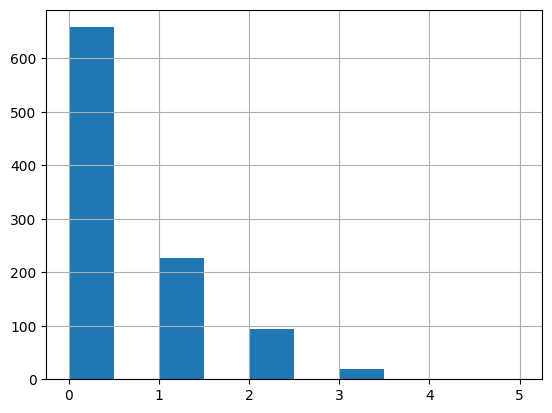

In [33]:
df["number_of_children"].hist()

В пандасе нет удобнго способа визуализировать проценты => используем seaborn

In [34]:
import seaborn as sns

<Axes: xlabel='number_of_children', ylabel='Probability'>

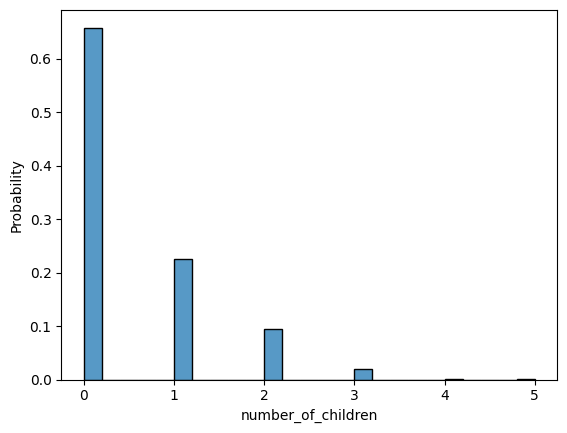

In [35]:
sns.histplot(df["number_of_children"], stat="probability")

Остались непрерывные величины

хотим разбить распределение возраста на отрезки => ГИСТОГРАММА

<Axes: >

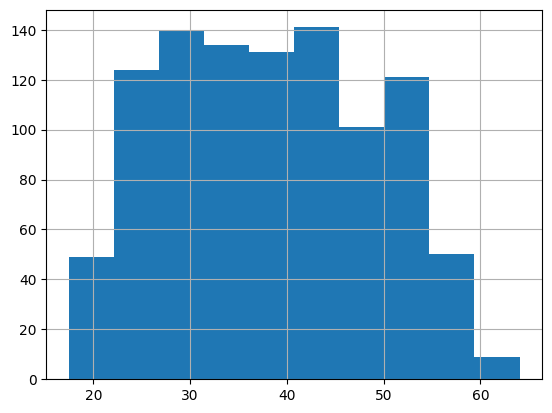

In [36]:
df["age"].hist()

<Axes: xlabel='age', ylabel='Count'>

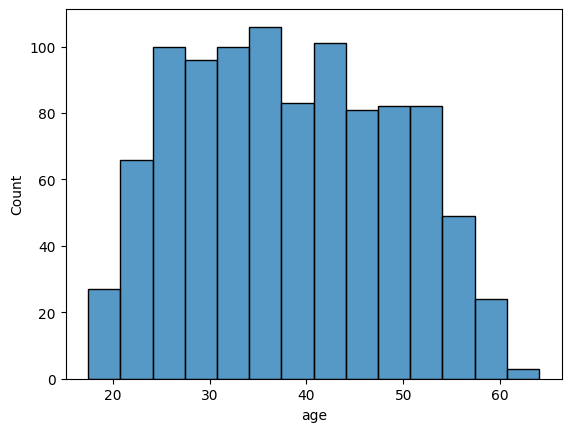

In [37]:
sns.histplot(df["age"])

можно разбить на отрезки явно

In [38]:
df["age_bin"]=pd.cut(df["age"],10)
df.groupby("age_bin")["age"].count()

age_bin
(17.402, 22.107]     49
(22.107, 26.766]    124
(26.766, 31.425]    140
(31.425, 36.084]    134
(36.084, 40.743]    131
(40.743, 45.401]    141
(45.401, 50.06]     101
(50.06, 54.719]     121
(54.719, 59.378]     50
(59.378, 64.037]      9
Name: age, dtype: int64

In [39]:
df.head()

,age,number_of_children,income,age_bin
0,42.772420,0,34396.537188,"(40.743, 45.401]"
1,29.561090,0,183350.052521,"(26.766, 31.425]"
2,54.380735,0,53689.856555,"(50.06, 54.719]"
3,42.551689,0,109080.913926,"(40.743, 45.401]"
4,38.713080,0,153612.343419,"(36.084, 40.743]"


Посмотрим на среднее и медину

In [40]:
print(df["age"].mean())
print(df["age"].median())
print(df["number_of_children"].mean())
print(df["number_of_children"].median())
print(df["number_of_children"].mode())

38.31925590719966
37.71059567987962
0.483
0.0
0    0
Name: number_of_children, dtype: int64


<Axes: >

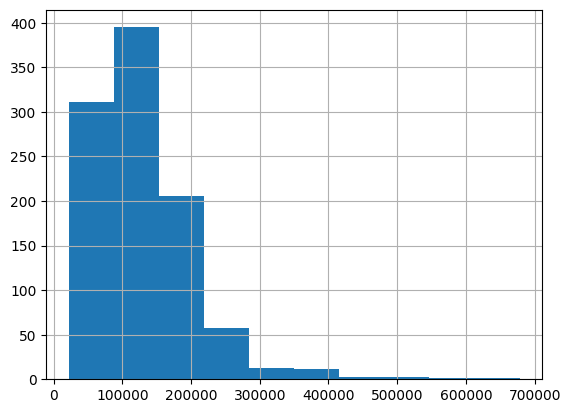

In [41]:
df["income"].hist()


Квантили))) найдем значение , которое отсекает 40 процентов людей по зарплате
---



In [42]:
df["income"].quantile(0.4)

100512.68685217279

In [43]:
(df["income"] < df["income"].quantile(0.4)).mean()

0.4

=> у 40 процентов людей меньше 100 000 рублей

#Квартили

In [44]:
print(df["income"].quantile(0.25))
print(df["income"].quantile(0.5))
print(df["income"].quantile(0.75))

79594.0403996465
114586.57093898312
162888.8910808624


In [45]:
df["age"].quantile(0.25)
df.age.max()

64.03655933897119

#Boxplot

<Axes: >

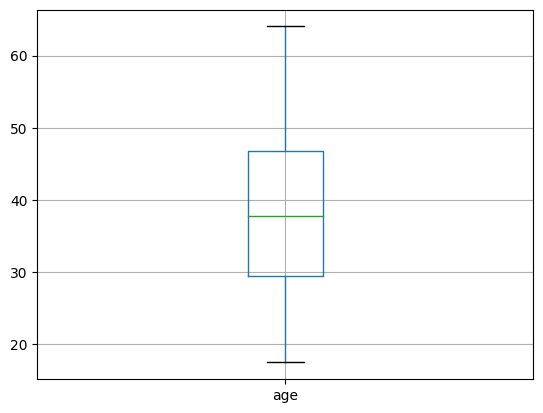

In [46]:
df.boxplot('age')

<Axes: >

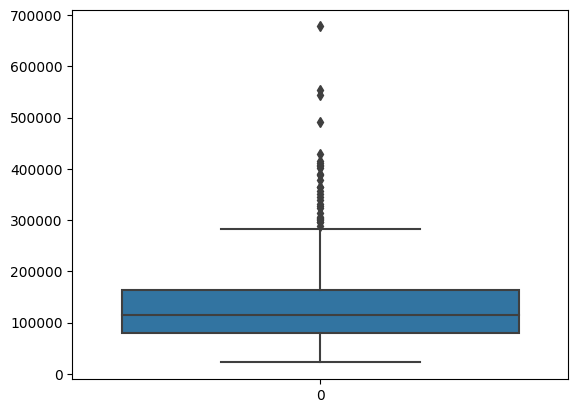

In [22]:
sns.boxplot(df["income"])

In [47]:
df.income.describe()

count      1000.000000
mean     129415.746378
std       71251.620971
min       21943.855414
25%       79594.040400
50%      114586.570939
75%      162888.891081
max      678006.351857
Name: income, dtype: float64

#StandartMEAN

In [48]:
pd.options.display.max_rows=100

In [49]:
df["income"].mean()

129415.74637843431

DISPERSIA

In [50]:
np.sqrt(((df["income"]-df["income"].mean())**2).mean())

71215.98624927517

Correlation

In [51]:
df[['age','income']].corr()

,age,income
age,1.000000,-0.048164
income,-0.048164,1.000000


In [52]:
df.groupby('age_bin')['income'].agg(['count','mean','median'])

,count,mean,median
age_bin,,,
"(17.402, 22.107]",49,104319.382165,88163.526875
"(22.107, 26.766]",124,133775.791324,125960.906191
"(26.766, 31.425]",140,130575.738767,114947.477353
"(31.425, 36.084]",134,135654.848704,118368.874351
"(36.084, 40.743]",131,134457.081592,128647.922872
"(40.743, 45.401]",141,139697.676942,123441.920529
"(45.401, 50.06]",101,142814.622910,122199.047306
"(50.06, 54.719]",121,112563.104588,95443.103632
"(54.719, 59.378]",50,104040.538214,91602.734609


<Axes: xlabel='age_bin'>

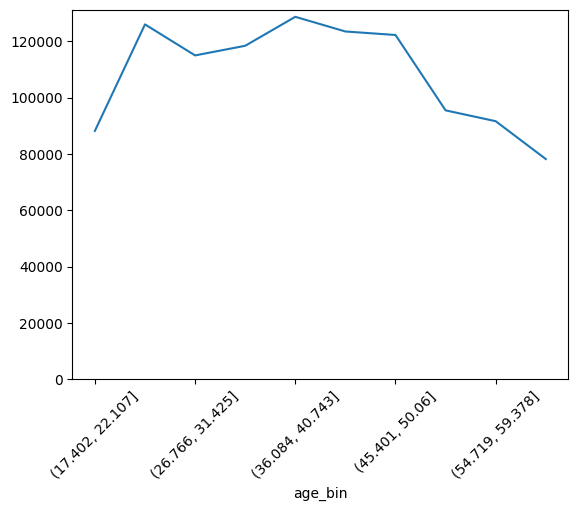

In [56]:
df.groupby("age_bin")["income"].median().plot(rot=45, ylim=0)

<Axes: xlabel='age', ylabel='income'>

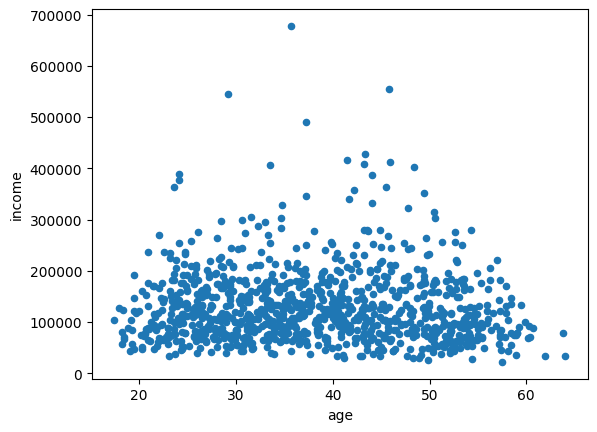

In [57]:
df.plot(x="age", y="income", kind="scatter")